## Week 3 Part 2 - Assignment on two-mode networks 

### Team KJW (Ken Popkin, Jagdish Chhabria, Willie Smalls)

In [ ]:
# The following video describes our work on this assignment

from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="KJW_Wk3_Assign2_Davis_Bimodal_DS620.mp4" type="video/mp4">
</video></div>""")

In [37]:
# Import required libraries
import matplotlib.pyplot as plt
import networkx as nx
#from networkx.algorithms import bipartite
import networkx.algorithms.bipartite as bipartite
import numpy as np
%matplotlib inline


## Davis Southern Club Women

Here is a dataset that shows a simple 2-mode network: the attendance of 18 Southern Women at 14 social events. The graph is bipartite (clubs, women).

What can you infer about the relationships between (1) the women, and (2) the social events?

In [40]:
# Import the southern women network data collected by Davis and others
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

In [34]:
# Check if this network is bipartite
bipartite.is_bipartite(G)

True

In [3]:
# Print the bipartite adjacency matrix
print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


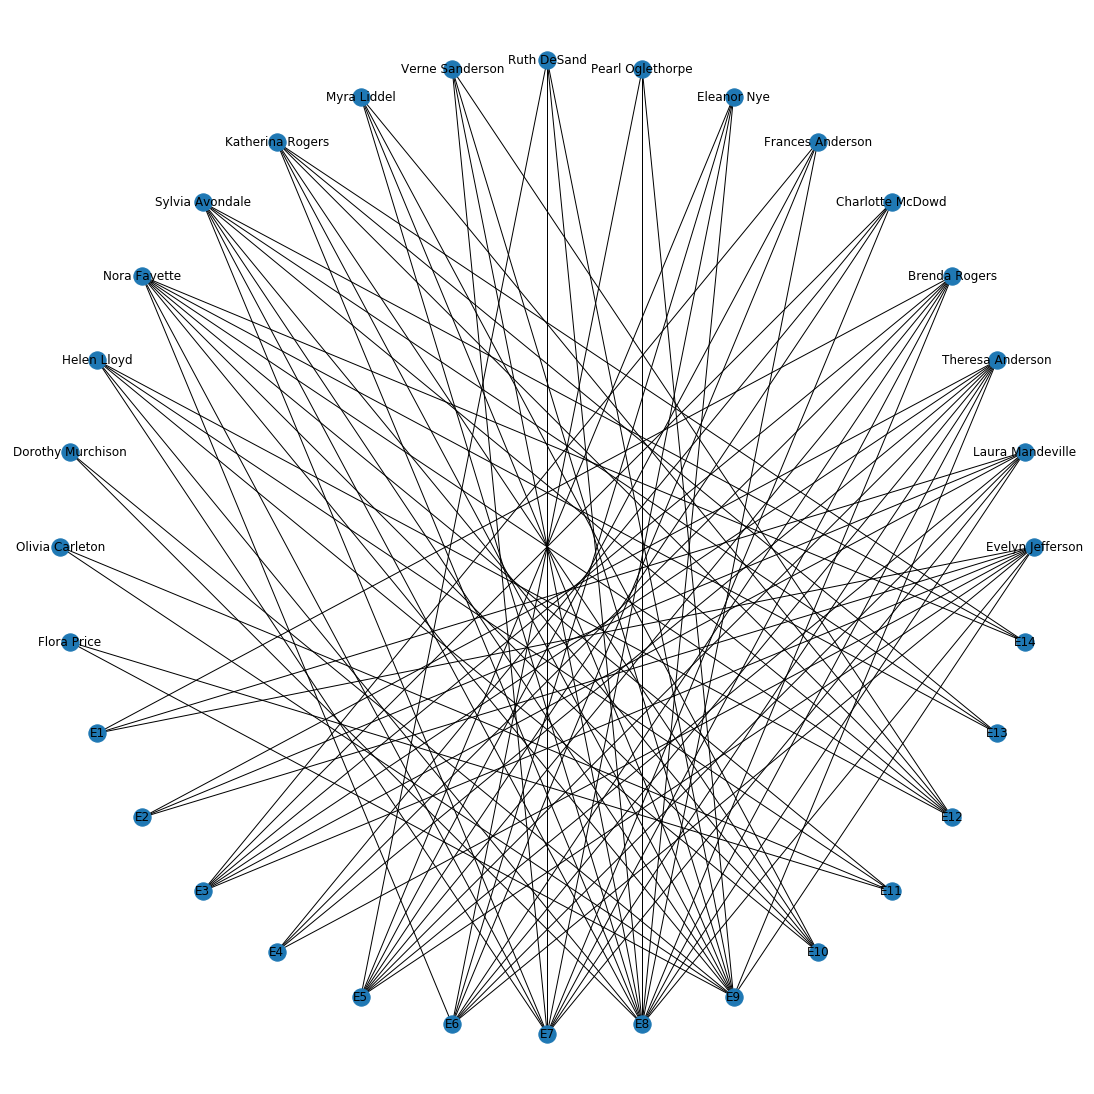

In [22]:
#Generate graph of women and events
plt.figure(figsize=(15,15))   
nx.draw_circular(G, with_labels=True) 
plt.show() 

<Figure size 1152x1152 with 0 Axes>

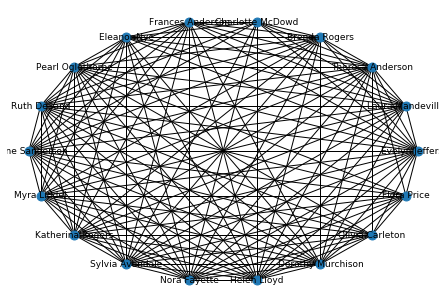

<Figure size 1152x1152 with 0 Axes>

In [19]:
# Project the bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
nx.draw_circular(W, with_labels=True, node_size=80,font_size=9)
plt.figure(3,figsize=(16,16)) 

The above projected graph allows us to see which women are connected based on attendance at common events

In [13]:
# Show connections between women based on attendance at common events
print('')
print("Women  ","       Number of connections")
for w in women:
    print('%s %d' % (w, W.degree(w)))


Women          Number of connections
Evelyn Jefferson 17
Laura Mandeville 15
Theresa Anderson 17
Brenda Rogers 15
Charlotte McDowd 11
Frances Anderson 15
Eleanor Nye 15
Pearl Oglethorpe 16
Ruth DeSand 17
Verne Sanderson 17
Myra Liddel 16
Katherina Rogers 16
Sylvia Avondale 17
Nora Fayette 17
Helen Lloyd 17
Dorothy Murchison 16
Olivia Carleton 12
Flora Price 12


The data above is just another representation of the projection of the bipartite network onto just the set of women. For example, it can be inferred that Evelyn Jefferson is connected to all the other 17 women because she as attended common events with them at some point of time.

<Figure size 1152x1152 with 0 Axes>

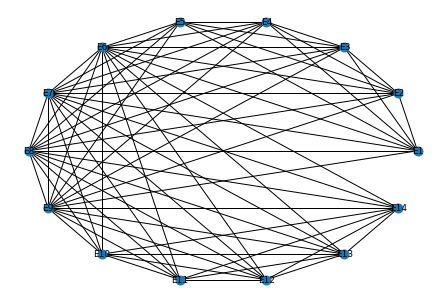

<Figure size 1152x1152 with 0 Axes>

In [23]:
# Project the bipartite graph onto event nodes
C = bipartite.projected_graph(G, clubs)
nx.draw_circular(C, with_labels=True, node_size=80,font_size=9)
plt.figure(3,figsize=(16,16)) 

The above graph shows connected events based on attendance by the same woman

In [30]:
# Show count of events attended by each woman
import pandas as pd
df = pd.DataFrame(list(G.edges()),columns =['Women', 'Event'])
df_social=df.groupby('Women').count()
df_social.sort_values(by='Event',ascending=False)

,Event
Women,
Nora Fayette,8
Theresa Anderson,8
Evelyn Jefferson,8
Brenda Rogers,7
Sylvia Avondale,7
Laura Mandeville,7
Katherina Rogers,6
Helen Lloyd,5
Frances Anderson,4


In [35]:
df_popular=df.groupby('Event').count()
df_popular.sort_values(by='Women',ascending=False)

,Women
Event,
E8,14
E9,12
E7,10
E5,8
E6,8
E12,6
E3,6
E10,5
E11,4


The data above shows the "socialness" of each woman based on number of events attended, as well as the popularity of events based on attendance.
Some sample conclusions:
1) Events 8 and 9 are the most attended events.
2) Theresa Anderson, Evelyn Jefferson, and Nora Fayette are the most social women.
3) Brenda Rogers, Thresa Anderson, Lauran Mandeville, Evelyn Jefferson have a strong relationship because they attend similar events.
4) Olivia Carleton and Flora Price have only attended two events and the events are the same e9 and e11. They may have a pre-existing friendship or may be new members.

In [32]:
# Show which events were attended by each woman
from collections import defaultdict
ladies_dict = defaultdict(list)
for ladies, events in list(G.edges()):
    ladies_dict[ladies].append(events)
print(ladies_dict)

defaultdict(<class 'list'>, {'Evelyn Jefferson': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9'], 'Laura Mandeville': ['E1', 'E2', 'E3', 'E5', 'E6', 'E7', 'E8'], 'Theresa Anderson': ['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'], 'Brenda Rogers': ['E1', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'], 'Charlotte McDowd': ['E3', 'E4', 'E5', 'E7'], 'Frances Anderson': ['E3', 'E5', 'E6', 'E8'], 'Eleanor Nye': ['E5', 'E6', 'E7', 'E8'], 'Pearl Oglethorpe': ['E6', 'E8', 'E9'], 'Ruth DeSand': ['E5', 'E7', 'E8', 'E9'], 'Verne Sanderson': ['E7', 'E8', 'E9', 'E12'], 'Myra Liddel': ['E8', 'E9', 'E10', 'E12'], 'Katherina Rogers': ['E8', 'E9', 'E10', 'E12', 'E13', 'E14'], 'Sylvia Avondale': ['E7', 'E8', 'E9', 'E10', 'E12', 'E13', 'E14'], 'Nora Fayette': ['E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'], 'Helen Lloyd': ['E7', 'E8', 'E10', 'E11', 'E12'], 'Dorothy Murchison': ['E8', 'E9'], 'Olivia Carleton': ['E9', 'E11'], 'Flora Price': ['E9', 'E11']})
